# 8- MÉTRICAS

 La rápida expansión de NILM y el desarrollo de diferentes algoritmos, han hecho que sea esencial proporcionar una evaluación de rendimiento mediante el uso de métricas de desempeño. Las métricas de evaluación, comparan los resultados de la desagregaciónn (predicciones) de los modelos entrenados con los datos del set de validación (mediciones reales de cada proceso). NILMTK cuenta con el cálculo de métricas de evaluación mediante el uso del MeterGroup para la validación de los resultados mediante el set de validación 
 Vamos ahora analizar en nuestro dataset diferentes metricas como son FEAC,F1, EAE ,MNEAP y RMSE  que  resumimos a continuacion en el siguinte cuadro:

![metricas](metricas.png)

En primer lugar cargamos las ibrerías y realizamos otros ajustes:

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

from nilmtk import TimeFrame, MeterGroup, HDFDataStore, DataSet
from nilmtk.metrics import fraction_energy_assigned_correctly, mean_normalized_error_power
from nilmtk.metrics import rms_error_power, f1_score, error_in_assigned_energy

data_dir='./data/'

### Métricas individuales del modelo

In [3]:
#Librerías
from nilmtk.metrics import f1_score
from nilmtk.metrics import error_in_assigned_energy
from nilmtk.metrics import mean_normalized_error_power
from nilmtk.metrics import rms_error_power
from nilmtk.metrics import fraction_energy_assigned_correctly

In [4]:

labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Incandescent Lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})


 

#Set para validación
valid = DataSet('dsualmh.h5')
valid.set_window(start="2023-06-09 12:55:00", end="2023-06-09 13:36:00")
valid_elec = valid.buildings[1].elec

print('Medidor de cabecera para desagregación:')
valid_Main = valid_elec.mains()
print(valid_Main)

print('\nDispositivos para validación de entrenamiento:')
valid_Devices = valid_elec.select(instance=[2,3,4,5,6,7,8,9,10,11])
print(valid_Devices)




index = list(labels['Meters'][1:11])
met = []
e = []

#Datos de Dispositivos: predicción
#dataset=DataSet(data_dir+'NILM/Results/FHMM_90s_first_pred.h5')
#Electric furnace	Microwave	Television	Incandescent Lamp	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.000	0.316	0.375	0.000	0.000	0.000	0.632	0.000	0.375	0.133
#EAE	0.404	0.096	0.014	0.021	0.048	0.077	0.149	0.011	0.002	0.001
#MNEAP	0.990	2.417	0.802	0.858	2.349	2.354	0.911	0.904	1.090	1.258
#RMSE	1035.168	622.580	30.504	51.696	383.924	607.297	561.321	25.163	44.028	39.903

#dataset=DataSet(data_dir+'NILM/Results/CO_90s_mean_pred.h5')
#	Electric furnace	Microwave	Television	Incandescent Lamp	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.444	0.357	0.800	0.467	0.235	0.000	0.308	0.452	0.240	0.261
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	1.037	1.288	0.466	0.869	2.027	1.000	1.580	0.727	1.612	1.362
#RMSE	945.031	286.946	21.542	46.429	301.793	621.117	711.989	22.134	49.814	40.085



dataset=DataSet(data_dir+'NILM/Results/CO_1s_mean_pred.h5')
#	Electric furnace	Microwave	Television	Incandescent Lamp	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.541	0.412	0.812	0.457	0.296	0.253	0.418	0.664	0.372	0.316 media= 0.4541
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	0.881	1.361	0.553	1.166	2.184	2.483	1.203	0.687	4.930	4.361
#RMSE	920.380	507.316	23.354	56.790	309.389	803.148	656.317	23.124	235.119	193.535


#dataset=DataSet(data_dir+'NILM/Results/CO_1s_first_pred.h5')
#	Electric furnace	Microwave	Television	Incandescent Lamp	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.515	0.448	0.721	0.517	0.259	0.263	0.483	0.661	0.400	0.327 media :0.4294
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	0.933	1.593	0.666	1.043	3.081	2.221	1.187	0.686	5.699	4.824
#RMSE	946.789	554.820	26.939	54.247	412.764	797.485	640.808	23.040	307.220	213.903

#dataset=DataSet(data_dir+'NILM/Results/CO_1s_median_pred.h5')
#	Electric furnace	Microwave	Television	Incandescent Lamp	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.495	0.463	0.810	0.482	0.279	0.144	0.397	0.585	0.453	0.447  media=0.4155
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	0.949	1.397	0.394	1.060	2.969	2.682	1.236	0.885	5.417	3.392
#RMSE	972.558	515.776	20.917	54.378	404.618	912.159	666.784	25.492	281.397	158.472




#dataset=DataSet(data_dir+'NILM/Results/CO_15s_mean_pred.h5')
#	Electric furnace	Microwave	Television	Incandescent Lamp	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.603	0.431	0.776	0.545	0.248	0.18	0.444	0.649	0.410	0.398 media =0.4084
#EAE	0.000	0.000	0.000	0.000	0.000	0.00	0.000	0.000	0.000	0.000
#MNEAP	0.858	1.551	0.591	1.105	2.851	2.36	1.199	0.713	2.215	2.047
#RMSE	883.066	486.788	24.530	54.988	362.516	843.89	634.270	21.836	73.202	65.037




predictions=dataset.buildings[1].elec.submeters()      

#Metricas
f1 = {};
eae = {};
feac = {};
mneap = {};
rmse = {};



f1['F1'] = f1_score(predictions, valid_Devices)

EAE = error_in_assigned_energy(predictions, valid_Devices)

for x in range(len(EAE)): e.append(EAE.iloc[x][0])
eae['EAE'] = e
#da error esta medida AttributeError: 'tuple' object has no attribute 'instance'
#feac['FEAC'] = np.ones(6)*(fraction_energy_assigned_correctly(predictions, valid_Devices))
mneap['MNEAP'] = mean_normalized_error_power(predictions, valid_Devices)
rmse['RMSE'] = rms_error_power(predictions, valid_Devices)
met.append(pd.concat([pd.DataFrame(feac, index=valid_Devices.instance()),
                      pd.DataFrame(f1),
                      pd.DataFrame(eae, index=valid_Devices.instance()),
                      pd.DataFrame(mneap),
                      pd.DataFrame(rmse)],
                     axis=1).set_index(pd.Index(index)))

dataset.store.close()       
print('\n\nDone!')
metrics=met[0].transpose().round(3)
metrics

Medidor de cabecera para desagregación:
ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])

Dispositivos para validación de entrenamiento:
MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  El

,Electric furnace,Microwave,Television,Incandescent Lamp,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
F1,0.541,0.412,0.812,0.457,0.296,0.253,0.418,0.664,0.372,0.316
EAE,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
MNEAP,0.881,1.361,0.553,1.166,2.184,2.483,1.203,0.687,4.930,4.361
RMSE,920.380,507.316,23.354,56.790,309.389,803.148,656.317,23.124,235.119,193.535


Carga de datos de predicciones y GT en memoria

In [5]:
gt=valid_elec.dataframe_of_meters(ac_type='active', sample_period=60, resample_kwargs={'how':'first'})


labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Incandescent Lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})


Meters={}
for x in range(len(labels)): Meters[valid_elec[x+1]]=labels['Meters'][x]
    

    
    
#resultados de predicción modelo CO 90s
#CO_90s_first=DataSet(data_dir+'NILM/Results/CO_90s_first_pred.h5')
#elec_CO_90s_first=CO_90s_first.buildings[1].elec
#resultados de predicción modelo CO 1s
CO_1s_first=DataSet(data_dir+'NILM/Results/CO_1s_first_pred.h5')
elec_CO_1s_first=CO_1s_first.buildings[1].elec


#resultados de predicción modelo FHMM 90s
FHMM_90s_first=DataSet(data_dir+'NILM/Results/FHMM_90s_first_pred.h5')
elec_FHMM_90s_first= FHMM_90s_first.buildings[1].elec    
    
    

gt.columns=list(Meters.values())
#pred_CO=elec_CO_90s_first.dataframe_of_meters(ac_type='active')
pred_CO=elec_CO_1s_first.dataframe_of_meters(ac_type='active')
pred_CO.columns=[list(Meters.values())[0]]+list(Meters.values())[1:12]

pred_FHMM=elec_FHMM_90s_first.dataframe_of_meters(ac_type='active')
pred_FHMM.columns=[list(Meters.values())[0]]+list(Meters.values())[1:12]

### Análisis particular del cálculo de cada métrica

Metrica FEAC ( puede dar problemas con AttributeError: 'tuple' object has no attribute 'instance')

In [6]:
#Carga de datos de predicciones y GT en memoria
gt=valid_elec.dataframe_of_meters(ac_type='active', sample_period=1, resample_kwargs={'how':'mean'})
gt.columns=list(Meters.values())

10/10 ElecMeter(instance=11, building=1, dataset='CO', appliances=[Appliance(type='freezer', instance=1)])instance=1)])=1)])

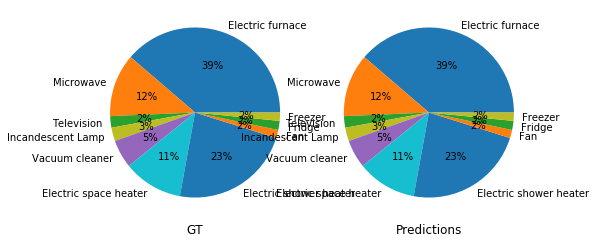

In [7]:
predictions_Devices=elec_CO_1s_first.submeters()

frac_1 = valid_Devices.fraction_per_meter()
frac_2 = predictions_Devices.fraction_per_meter()
fig, (ax1, ax2) = plt.subplots(1, 2 ,gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

frac_1.plot(autopct=lambda p:'{:.0f}%'.format(p), kind='pie',labels=list(Meters.values())[1:12], figsize=(8,8), ax=ax1,   colors=['tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan'])
frac_2.plot(autopct=lambda p:'{:.0f}%'.format(p), kind='pie',  labels=list(Meters.values())[1:12], figsize=(8,8), ax=ax2,  colors=['tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan']) 

ax1.set(ylabel="")
ax1.set(xlabel="GT")
ax2.set(ylabel="")
ax2.set(xlabel="Predictions")
plt.savefig('./data/images/5.4_FEAC_CO_1s.svg', bbox_inches='tight', transparent=True)
pass

## Métrica F1

Esta métrica mide la precisión o asertividad del modelo entrenado mediante el cálculo de la media armónica utilizando las métricas Precision y Recall. Estas métricas son calculadas internamente por NILMTK mediante la matriz de confusión, vease la ecuación de la figura siguiente.

![metricas](metricas.jpg)

Precision se entiende como la fracción de cortes de tiempo en los que se predijo correctamente que un proceso estaba activo, pero realmente se encontraba apagado. Por lo contrario, Recall hace referencia a la fracción de cortes de tiempo en los que se predijo correctamente que el dispositivo estaba encendido y realmente se encontraba encendido .

In [8]:
pd.DataFrame(metrics.loc['F1']).transpose()*100

,Electric furnace,Microwave,Television,Incandescent Lamp,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
F1,54.1,41.2,81.2,45.7,29.6,25.3,41.8,66.4,37.2,31.6


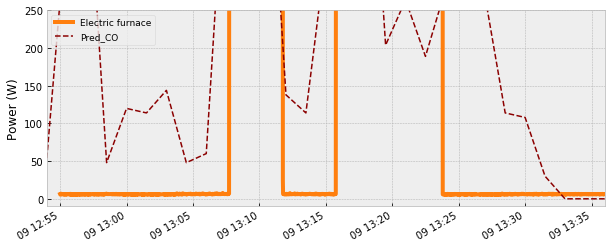

In [9]:
rcParams['figure.figsize'] = (10, 4)



#valid.set_window(start="2023-06-09 12:55:00", end="2023-06-09 13:36:00")
t0='2023-06-09 12:55:00'#tiempo inicial  validacion
t1='2023-06-09 13:36:00' #tiempo final validacion




fig, ax1 = plt.subplots();
ax1=gt['Electric furnace'].plot(lw=4, c='tab:orange')
pred_CO['Electric furnace'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Electric furnace','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim()

#ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

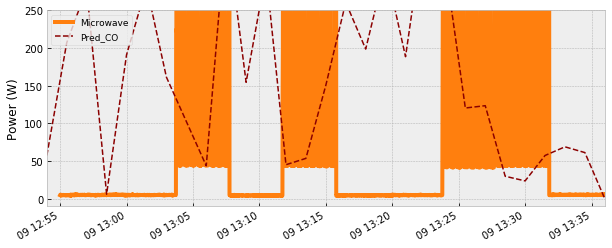

In [10]:
rcParams['figure.figsize'] = (10, 4)


fig, ax1 = plt.subplots();
ax1=gt['Microwave'].plot(lw=4, c='tab:orange')
pred_CO['Microwave'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Microwave','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)

ax1.set_xlim()
#ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')

       

plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

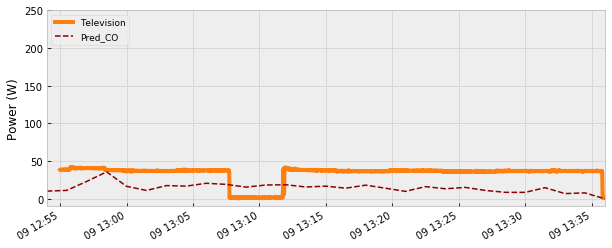

In [11]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Television'].plot(lw=4, c='tab:orange')
pred_CO['Television'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Television','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim()
#ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

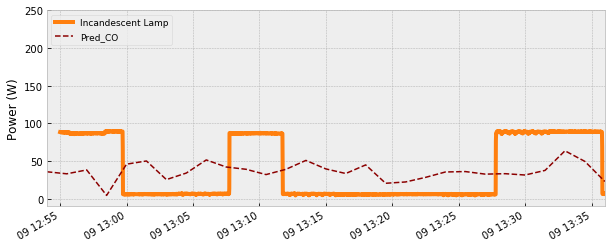

In [12]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Incandescent Lamp'].plot(lw=4, c='tab:orange')
pred_CO['Incandescent Lamp'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Incandescent Lamp','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)

ax1.set_xlim()
#ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')

plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

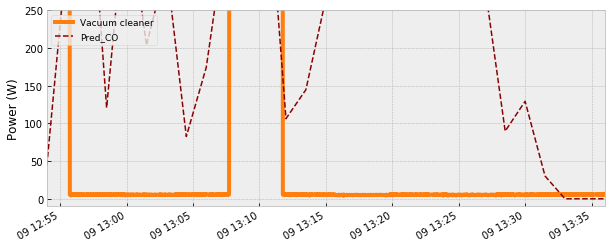

In [13]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Vacuum cleaner'].plot(lw=4, c='tab:orange')
pred_CO['Vacuum cleaner'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Vacuum cleaner','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim()
#ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

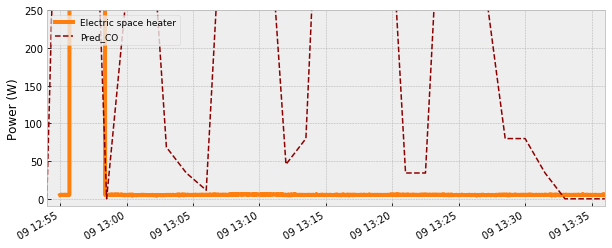

In [14]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Electric space heater'].plot(lw=4, c='tab:orange')
pred_CO['Electric space heater'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Electric space heater','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)

ax1.set_xlim()
#ax1.set_xlim(t0,t1)
ax1.minorticks_off()
#ax1.set_xticklabels(labels=['10:00','10:10','10:20','10:30','10:40','10:50','11:00','11:15'] , horizontalalignment ='right')  

ax1.set_ylabel('Power (W)')




plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

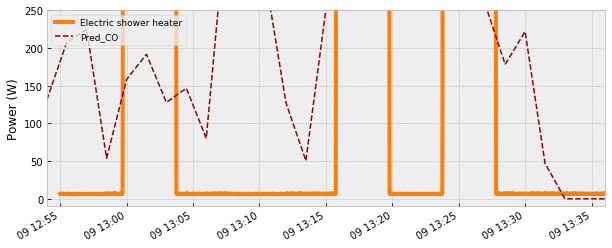

In [15]:
rcParams['figure.figsize'] = (10, 4)


fig, ax1 = plt.subplots();
ax1=gt['Electric shower heater'].plot(lw=4, c='tab:orange')
pred_CO['Electric shower heater'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Electric shower heater','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim()
#ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

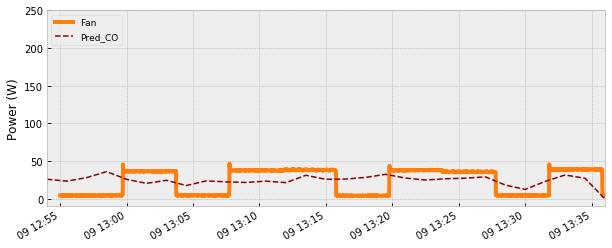

In [16]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Fan'].plot(lw=4, c='tab:orange')
pred_CO['Fan'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Fan','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)

ax1.set_xlim()
#ax1.set_xlim(t0,t1)

ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

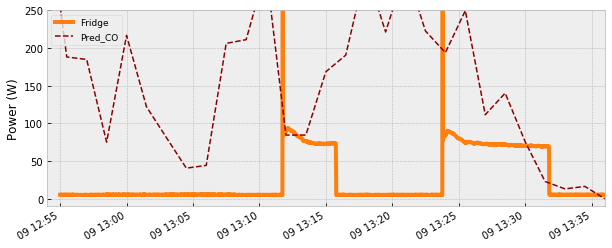

In [17]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Fridge'].plot(lw=4, c='tab:orange')
pred_CO['Fridge'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Fridge','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)

#ax1.set_xlim(t0,t1)
ax1.set_xlim()
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')

         

plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

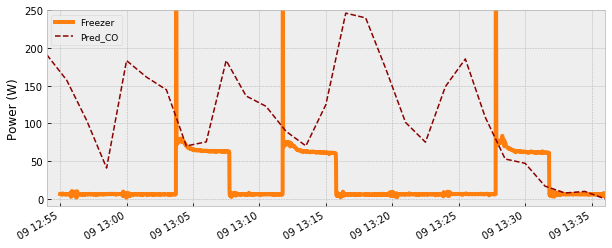

In [18]:
rcParams['figure.figsize'] = (10, 4)
fig, ax1 = plt.subplots();
ax1=gt['Freezer'].plot(lw=4, c='tab:orange')
pred_CO['Freezer'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Freezer','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim()
#ax1.set_xlim(t0,t1)
ax1.minorticks_off()
ax1.set_ylabel('Power (W)')




plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

## Métrica EAE

La ecuación de la figura representa la diferencia entre la energía total asignada yˆt(n) energía total consumida yt(n) por el proceso n de la industria en kWh 

![metricas](metricas.jpg)

In [19]:
round(pd.DataFrame(metrics.loc['EAE']).transpose(),2)

,Electric furnace,Microwave,Television,Incandescent Lamp,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
EAE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
predictions_Devices=elec_CO_1s_first.submeters()
e1=predictions_Devices[10].total_energy()[0]
e2=valid_Devices[10].total_energy()[0]
eae=round(abs(e1-e2),2)

pd.DataFrame([e1,e2,eae], columns=['kWh'], index=['Energy_pred','Energy_GT','EAE'])

,kWh
Energy_pred,0.018187
Energy_GT,0.018187
EAE,0.000000


## Métrica MNEAP

Este indicador que representa la ecuacion de la imagen  consta de la diferencia entre la potencia asignada yˆt(n) y la potencia real yt(n) de cada proceso de la industria, por cada intervalo de tiempo t. Después de sumar todas las diferencias de potencia, el resultado es normalizado por el consumo total de la energía del proceso 

![metricas](metricas.jpg)

In [21]:
round(pd.DataFrame(metrics.loc['MNEAP']).transpose(),2)

,Electric furnace,Microwave,Television,Incandescent Lamp,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
MNEAP,0.88,1.36,0.55,1.17,2.18,2.48,1.2,0.69,4.93,4.36


## Métrica RMSE

Esta métrica de la ecuación de la figura es muy utilizada en la comparaciónn de diversos conjuntos de datos, consiste en el error cuadrático medio de la diferencia entre la potencia asignada yˆt(n) y la potencia real yt(n) del proceso de los applicativos , en cada intervalo de tiempo t .

![metricas](metricas.jpg)

In [22]:
round(pd.DataFrame(metrics.loc['RMSE']).transpose(),1)

,Electric furnace,Microwave,Television,Incandescent Lamp,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
RMSE,920.4,507.3,23.4,56.8,309.4,803.1,656.3,23.1,235.1,193.5


## Resultados de todos los modelos

In [23]:
from nilmtk.metrics import fraction_energy_assigned_correctly, f1_score, error_in_assigned_energy
from nilmtk.metrics import mean_normalized_error_power, rms_error_power 



periods = {'1s':1, '90s':90, '5min':60*5, '10min':60*10}


dir_predictions = data_dir +'NILM/Results/'
m = {}
classifiers = ['CO', 'FHMM']
methods = ['first', 'mean', 'median']
index = list(labels['Meters'][1:12])

for p_name, sp in periods.items():
    met = []
    for method in methods:
        for clf_name in classifiers:
            print('\nCalculando Metricas: '+ clf_name + '_' + p_name + '_' + method)  
           
            #Datos de Dispositivos: predicción
            input_dir = dir_predictions + clf_name + '_' + p_name + '_' + method +'_pred.h5'
            dataset = DataSet(input_dir)
            predictions=dataset.buildings[1].elec.submeters()       
            
            #Metricas
            f1 = {};
            eae = {};
            feac = {};
            mneap = {};
            rmse = {};
            e=[];  
            
            
            F1 = f1_score(predictions, valid_Devices)
            f1['F1'] = F1*100
            EAE = error_in_assigned_energy(predictions, valid_Devices)
            
            for x in range(len(EAE)): e.append(EAE.iloc[x][0])
            eae['EAE'] = e
            #da error para FEAC
            #feac['FEAC'] = 100*np.ones(6)*(fraction_energy_assigned_correctly(predictions, valid_Devices))
            mneap['MNEAP'] = mean_normalized_error_power(predictions, valid_Devices)
            rmse['RMSE'] = rms_error_power(predictions, valid_Devices)
            met.append(pd.concat([pd.DataFrame(feac, index=valid_Devices.instance()),
                                  pd.DataFrame(f1),
                                  pd.DataFrame(eae, index=valid_Devices.instance()),
                                  pd.DataFrame(mneap),
                                  pd.DataFrame(rmse)],
                                 axis=1).set_index(pd.Index(index)))
            dataset.store.close()        
    m[p_name] = met

##Guardamos resultados
f = open(data_dir +'NILM/metrics.txt',"w")
f.write( str(m) )
f.close()
print('\n\nDone!')




Calculando Metricas: CO_1s_first

Calculando Metricas: FHMM_1s_first

Calculando Metricas: CO_1s_mean

Calculando Metricas: FHMM_1s_mean

Calculando Metricas: CO_1s_median

Calculando Metricas: FHMM_1s_median

Calculando Metricas: CO_90s_first

Calculando Metricas: FHMM_90s_first

Calculando Metricas: CO_90s_mean

Calculando Metricas: FHMM_90s_mean

Calculando Metricas: CO_90s_median

Calculando Metricas: FHMM_90s_median

Calculando Metricas: CO_5min_first

Calculando Metricas: FHMM_5min_first

Calculando Metricas: CO_5min_mean

Calculando Metricas: FHMM_5min_mean

Calculando Metricas: CO_5min_median

Calculando Metricas: FHMM_5min_median

Calculando Metricas: CO_10min_first

Calculando Metricas: FHMM_10min_first

Calculando Metricas: CO_10min_mean

Calculando Metricas: FHMM_10min_mean

Calculando Metricas: CO_10min_median

Calculando Metricas: FHMM_10min_median


Done!


## Otras Metricas: métricas Promedio

In [28]:
m_mean = {}



cols=['F1','EAE','MNEAP','RMSE']
labels=['CO-first', 'CO-mean', 'CO-median', 'FHMM-first', 'FHMM-mean' ,'FHMM-median']
per=['1s','5min','10min']

for c in cols:
    m_mean[c] = pd.DataFrame([#CO FIRST
                             [m['1s'][0][c].mean(),
                              m['5min'][0][c].mean(),m['10min'][0][c].mean()],
                              #CO MEAN
                             [m['1s'][2][c].mean(),
                              m['5min'][2][c].mean(),m['10min'][2][c].mean()],
                              #CO MEDIAN
                             [m['1s'][4][c].mean(),
                              m['5min'][4][c].mean(),m['10min'][4][c].mean()],
                             #FHMM FIRST
                             [m['1s'][1][c].mean(),
                             m['5min'][1][c].mean(),m['10min'][1][c].mean()],
                             #FHMM MEAN            
                             [m['1s'][3][c].mean(),
                              m['5min'][3][c].mean(),m['10min'][3][c].mean()],
                             #FHMM MEDIAN
                             [m['1s'][5][c].mean(),
                              m['5min'][5][c].mean(),m['10min'][5][c].mean()]],columns=per, index=labels).transpose()
m_mean



{'F1':         CO-first    CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 1s     45.935485  45.406875  45.553147   18.307018  39.621667    25.797619
 5min    6.222222  16.000000   6.222222   23.015873  16.089466    17.015873
 10min   0.000000   0.000000   0.000000    6.666667   6.666667     6.666667,
 'EAE':        CO-first  CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 1s     0.000000      0.0        0.0    0.082415   0.034141     0.041743
 5min   0.000000      0.0        0.0    0.000000   0.000000     0.000000
 10min  0.101832      0.0        0.0    0.000000   0.000000     0.000000,
 'MNEAP':        CO-first   CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 1s     2.193272  1.980958   2.038112    1.393318   1.196859     1.112374
 5min   0.994473  1.099313   0.992482    1.033266   0.952670     1.062668
 10min  1.000000  1.000000   1.000000    0.771383   0.736045     0.794283,
 'RMSE':          CO-first     CO-mean   CO-median  FHMM-first   FHMM-mean  FHMM-me

## Maximos


In [29]:
cols=['F1','EAE','MNEAP','RMSE']

maxs=pd.concat([m_mean['F1'].transpose().max(),
                m_mean['EAE'].transpose().min(),
                m_mean['MNEAP'].transpose().min(),
                m_mean['RMSE'].transpose().min()], axis=1)
maxs.columns=cols
maxs = maxs.transpose()
round(maxs,2)

,1s,5min,10min
F1,45.94,23.02,6.67
EAE,0.00,0.00,0.00
MNEAP,1.11,0.95,0.74
RMSE,262.83,196.08,160.81


## Correspondencia de Indice

In [30]:
cols=['F1','EAE','MNEAP','RMSE']

maxs_i=pd.concat([m_mean['F1'].transpose().idxmax(),
                 m_mean['EAE'].transpose().idxmin(),
                 m_mean['MNEAP'].transpose().idxmin(),
                 m_mean['RMSE'].transpose().idxmin()], axis=1)
maxs_i.columns=cols
maxs_i = maxs_i.transpose()
maxs_i

,1s,5min,10min
F1,CO-first,FHMM-first,FHMM-first
EAE,CO-first,CO-first,CO-mean
MNEAP,FHMM-median,FHMM-mean,FHMM-mean
RMSE,FHMM-median,FHMM-mean,FHMM-mean


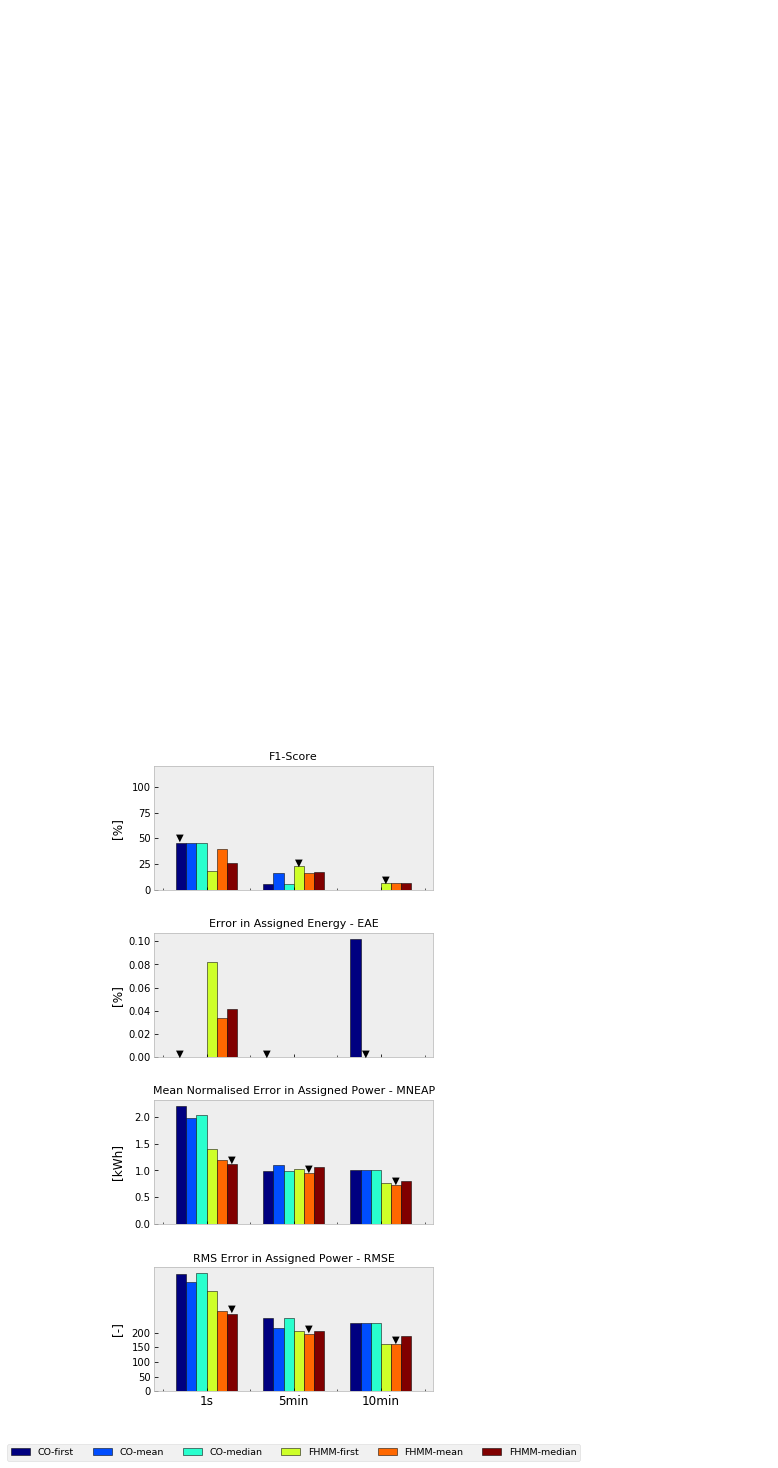

In [27]:
rcParams['figure.figsize'] = (5, 11.5)
fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=True, gridspec_kw={'hspace': 0.35})
cols=['F1','EAE','MNEAP','RMSE']
ylabels=['[%]','[%]','[kWh]','[-]','[W]']
per=['1s','5min','10min']

labels={'CO-first':-0.35, 'CO-mean':-0.22, 'CO-median':-0.11, 'FHMM-first':0.01, 'FHMM-mean':0.13 ,'FHMM-median':0.245}

c=0
for ax in fig.get_axes():      
    m_mean[cols[c]].plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False, cmap="jet")
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    x = 0
    for p in per:
        ax.annotate("▼", xy=(labels[maxs_i[p][cols[c]]]+x, maxs[p][cols[c]]+maxs[p][cols[c]]*0.03))
        x+=1
    c+=1
    
ax5.set_xticklabels(labels=per, rotation=0, fontdict={'fontsize':12})
fig.align_ylabels([(ax2,ax3,ax4,ax5)])
ax2.set(ylim=(0,120))
ax2.set_yticks([0,25,50,75,100])
ax5.set_yticks([0,50,100,150,200])

ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')
lgd = ax5.legend(labels.keys(), loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.6),fontsize=9.5)

ax3.annotate("kWh", xy=(6.22, 0.9)); #30min FHMM-median
ax5.annotate("   W", xy=(6.22, 90)); #30min FHMM-median


plt.savefig('./data/images/5.7_All_metrics.svg', bbox_inches='tight', transparent=True)

pass

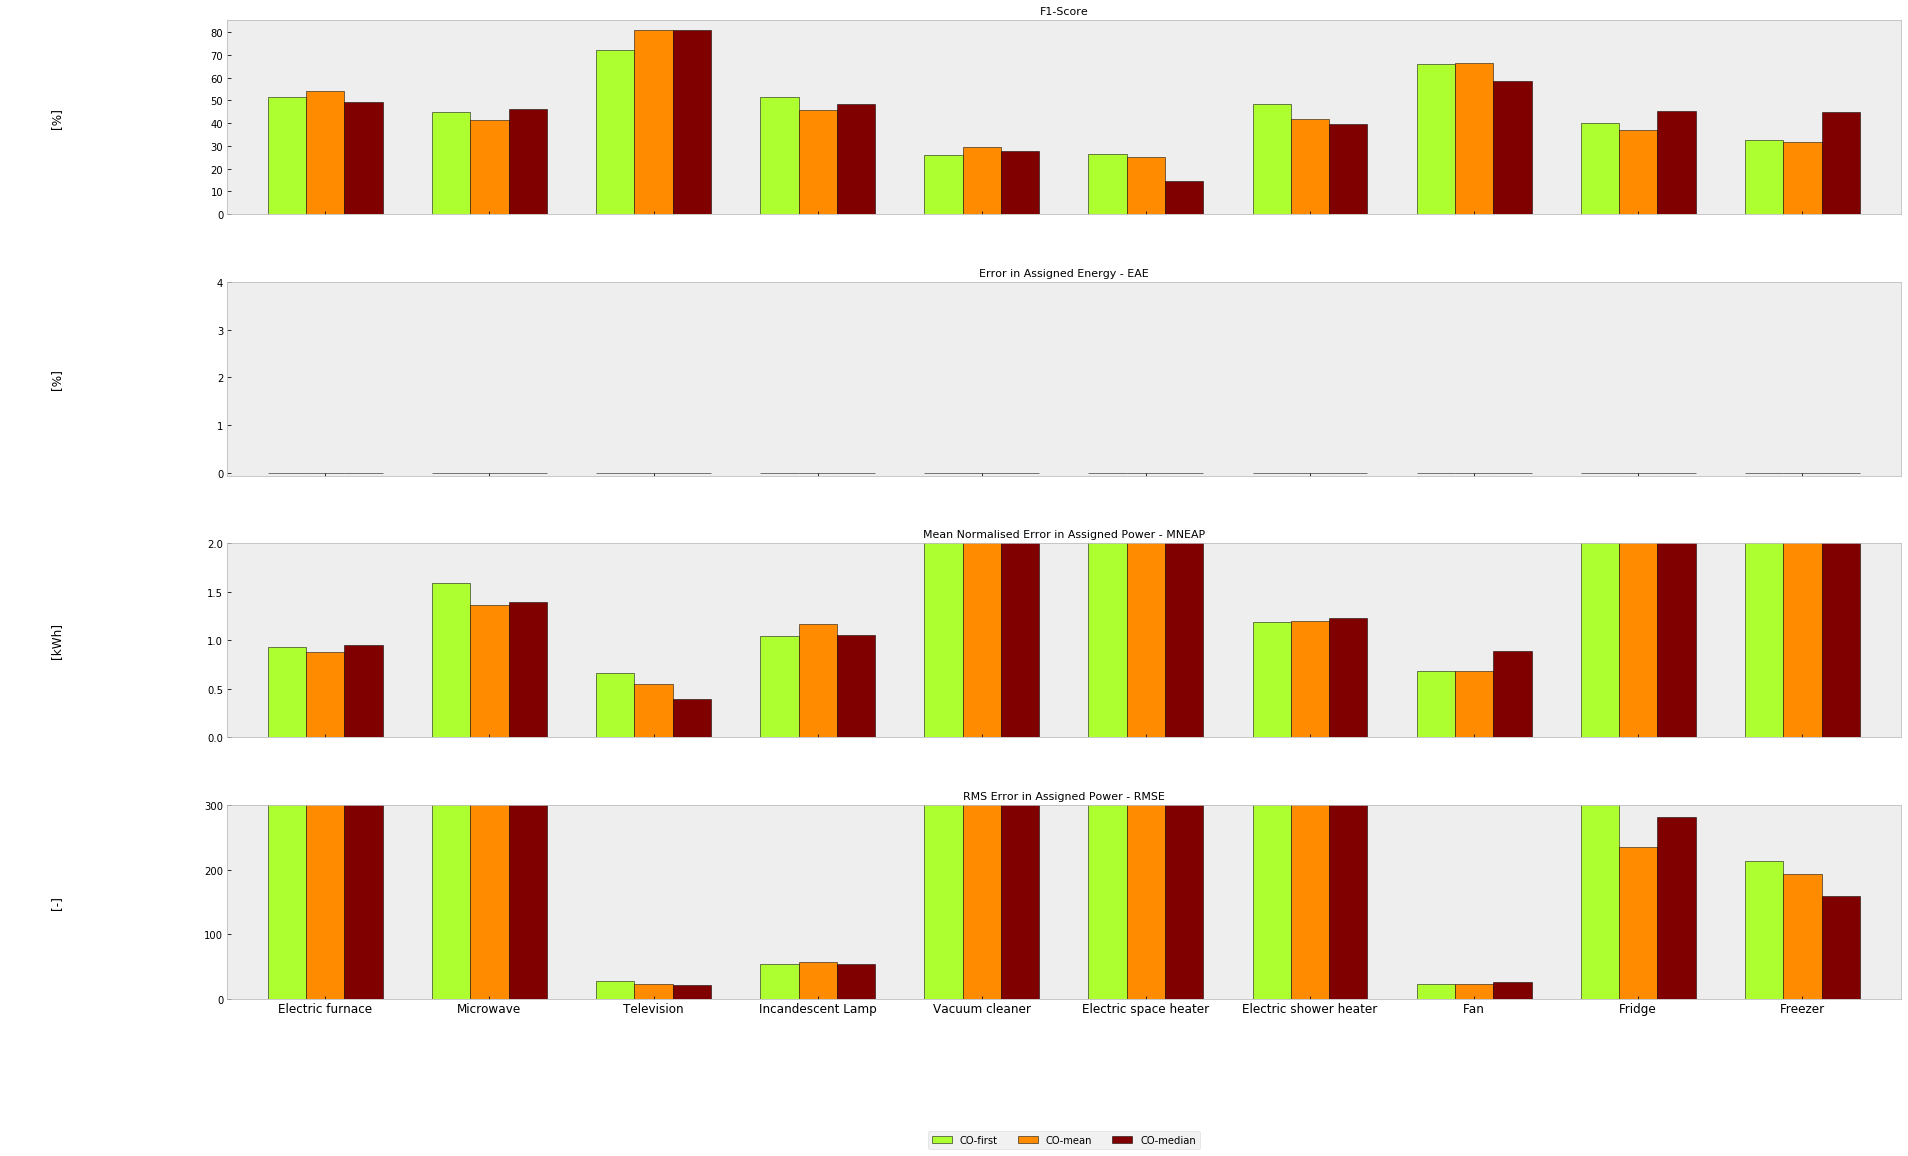

In [134]:
rcParams['figure.figsize'] = (30, 18)

fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=False, gridspec_kw={'hspace': 0.35})

#cols=['FEAC','F1','EAE','MNEAP','RMSE']
cols=['F1','EAE','MNEAP','RMSE']

ylabels=['[%]','[%]','[kWh]','[-]','[W]']
labels=['CO-first', 'CO-mean' ,'CO-median']
c=0

# 0=co first, 2=CO MEAN  Y 4= CO MEDIAN
# 1=FHMM FIRST, 2 FHMM MEAN Y 4 FHMM MEDIAN


#TOMAMOS CO1SEG POR NO DISPONER DE DATOS PARA FHMM DE 1SEGUNDO
for ax in fig.get_axes():
    
    df=pd.DataFrame([m['1s'][0][cols[c]],m['1s'][2][cols[c]],m['1s'][4][cols[c]]]).transpose()
    #if ax==ax1:
    #    df['FEAC'].mean().plot.barh(ax=ax1, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
    #else:
    #     df.plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
 
    df.plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    c+=1   
    

ax2.set_xticklabels('')
ax3.set_xticklabels('')
ax4.set_xticklabels('')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0, fontdict={'fontsize':12})
fig.align_ylabels([(ax1,ax2,ax3,ax4,ax5)])
ax3.set_yticks([0,1,2,3,4])
ax4.set(ylim=(0,1.8))
ax4.set_yticks([0,0.5,1,1.5,2])
ax5.set(ylim=(0,270))
ax5.set_yticks([0,100,200,300])
ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')
lgd = ax5.legend(labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.8))


plt.savefig('./data/images/5.8_All_metrics_2.svg', bbox_inches='tight', transparent=True)

pass

In [146]:
print('CO-first')
print(m['1s'][0])
print('\nCO-mean')
print(m['1s'][2])
print('\nCO-median')
print(m['1s'][4])

CO-first
                               F1  EAE     MNEAP        RMSE
Electric furnace        51.495449  0.0  0.932564  946.789320
Microwave               44.789916  0.0  1.593151  554.820132
Television              72.138229  0.0  0.665576   26.939233
Incandescent Lamp       51.706231  0.0  1.042976   54.247019
Vacuum cleaner          25.869038  0.0  3.080909  412.763757
Electric space heater   26.309379  0.0  2.221452  797.484566
Electric shower heater  48.260870  0.0  1.187182  640.808372
Fan                     66.065679  0.0  0.686191   23.040079
Fridge                  40.019333  0.0  5.699029  307.220214
Freezer                 32.700730  0.0  4.823691  213.902584

FHMM-mean
                               F1  EAE     MNEAP        RMSE
Electric furnace        54.050465  0.0  0.880674  920.380042
Microwave               41.244775  0.0  1.361387  507.315588
Television              81.199597  0.0  0.553183   23.353919
Incandescent Lamp       45.680934  0.0  1.165706   56.790272
Vacu

### Resultados del mejor modelo
En vista de los resultados del obtenidos, se propone la elección del modelo FHMM entrenado con datos promedio de dispositivos cada 30 segundos. Este modelo solo se considera adecuado para la desagregación de datos promedio de potencia activa medidos en cabecera cada 30 segundos.


 ## INDICES DEL DATAFRAME

CO_60s_first:0

FHMM_60s_first:1

CO_60s_mean:2

FHMM_60s_mean :3

CO_60s_median:4

FHMM_60s_median:5


------------------------------


CO_5min_first:6

FHMM_5min_first:7

CO_5min_mean:8

FHMM_5min_mean:9

CO_5min_median:10

 FHMM_5min_median:11


----------------------------


CO_10min_first:12

FHMM_10min_first:13

CO_10min_mean:14

FHMM_10min_mean :15

CO_10min_median:16

FHMM_10min_median:17

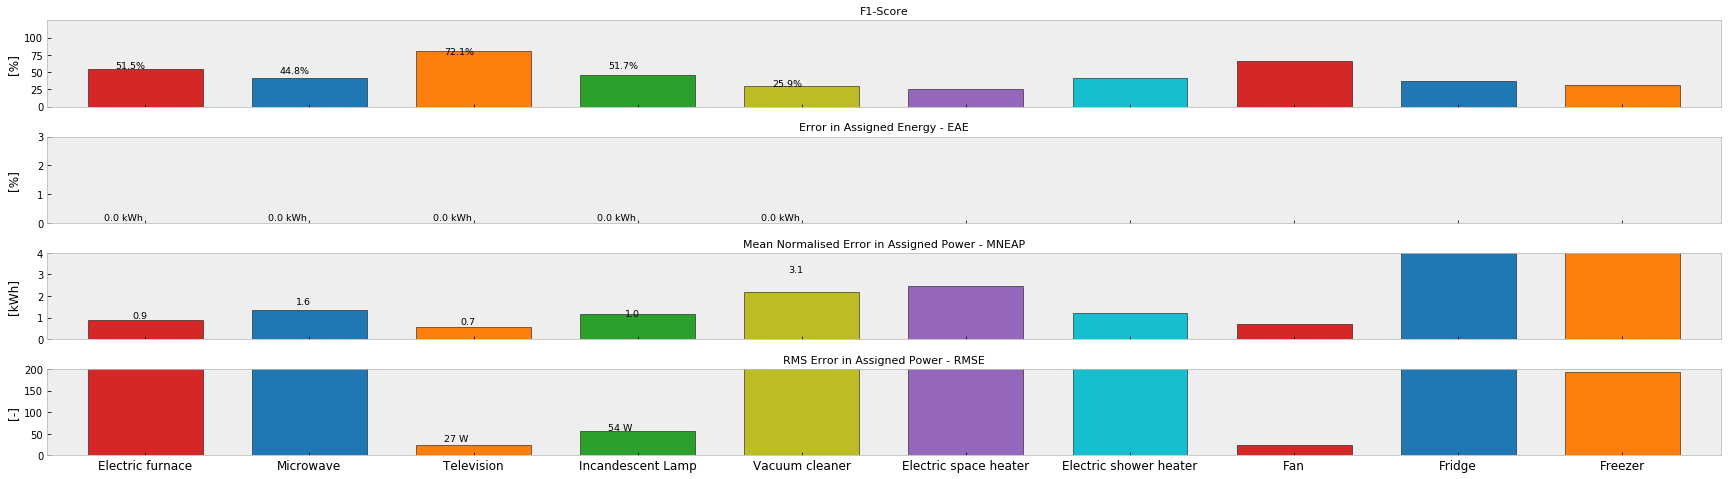

In [31]:
rcParams['figure.figsize'] = (30, 8)

fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=False, gridspec_kw={'hspace': 0.35})
#cols=['FEAC','F1','EAE','MNEAP','RMSE']

cols=['F1','EAE','MNEAP','RMSE']
ylabels=['[%]','[%]','[kWh]','[-]','[W]']
colors=['tab:red','tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan']
c=0


#ponemos como indice el 2 al ser CO MEAN
for ax in fig.get_axes():
    df=pd.DataFrame(m['1s'][2][cols[c]])
    df[cols[c]].plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False, color=colors)
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    c+=1


ax2.set_xticklabels('')
ax3.set_xticklabels('')
ax4.set_xticklabels('')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0, fontdict={'fontsize':12})

fig.align_ylabels([(ax2,ax3,ax4,ax5)])

ax2.set(ylim=(0,125))
ax3.set(ylim=(0,1))
ax4.set(ylim=(0,0.7))
ax5.set(ylim=(0,110))

ax2.set_yticks([0,25,50,75,100])
ax3.set_yticks([0,1,2,3])
ax4.set_yticks([0,1,2,3,4])
ax5.set_yticks([0,50,100,150,200])


ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')

df=pd.DataFrame(m['1s'][0])

for x in range(5):ax2.annotate(str(round(df['F1'][x],1))+'%', xy=(x-0.18 , df['F1'][x]+4),fontsize=9.5)
for x in range(5):ax3.annotate(str(round(df['EAE'][x],1))+' kWh', xy=(x-0.25 , df['EAE'][x]+0.1),fontsize=9.5)
for x in range(5):ax4.annotate(str(round(df['MNEAP'][x],1)), xy=(x-0.08 , df['MNEAP'][x]+0.03),fontsize=9.5)
for x in range(5):ax5.annotate(str(round(df['RMSE'][x]))+' W', xy=(x-0.18 , df['RMSE'][x]+5),fontsize=9.5)

plt.savefig('./data/images/5.9_Metrics_CO_1s_median.svg', bbox_inches='tight', transparent=True)

In [32]:
valid_Devices.total_energy()

Calculating total_energy for ElecMeterID(instance=11, building=1, dataset='dsualmh') ...   

active      1.055156
apparent    1.077208
reactive    0.076170
dtype: float64

In [137]:
valid_Devices.energy_per_meter()

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,"(2, 1, dsualmh)","(3, 1, dsualmh)","(4, 1, dsualmh)","(5, 1, dsualmh)","(6, 1, dsualmh)","(7, 1, dsualmh)","(8, 1, dsualmh)","(9, 1, dsualmh)","(10, 1, dsualmh)","(11, 1, dsualmh)"
active,0.408431,0.126377,0.023044,0.027059,0.056805,0.119409,0.24289,0.016321,0.018187,0.016634
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Replicando el entrenamiento del modelo

In [61]:
from nilmtk import DataSet
from nilmtk.legacy.disaggregate import FHMM


train = DataSet('dsualmh_test.h5')



train.set_window(start="2023-06-06 11:19:19", end="2023-06-06 11:40:28")

train_elec=train.buildings[1].elec 

#dispositivos a entrenar: 
train_Devices=train_elec.select(instance=[2,3,4,5,6,7,8,9,10,11])



#entrenamiento y exportación del modelo
CO_1s_median=FHMM()
CO_1s_median.MIN_CHUNK_LENGTH=1
CO_1s_median.train(train_Devices,
                        num_states_dict={}, #en otro caso: { }
                        ac_type='active',
                        sample_period=1,
                        resample_kwargs={'how':'median'})



print('\n\nDone!')


Training model for submeter 'ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='incandescent lamp', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=8, building=1

In [62]:
#from nilmtk.legacy.disaggregate import FHMM
from nilmtk.legacy.disaggregate import CombinatorialOptimisation
FHMM=FHMM()
#FHMM.import_model('C:/data/FHMM_30s_median_model.pickle') 
print('Oven: '+str(CO_1s_median.individual[valid_Devices[2]].means_))
print('Microwave: '+str(CO_1s_median.individual[valid_Devices[3]].means_))
print('Television: '+str(CO_1s_median.individual[valid_Devices[4]].means_))
print('Kettle: '+str(CO_1s_median.individual[valid_Devices[5]].means_))
print('Vacuum Cleaner: '+str(CO_1s_median.individual[valid_Devices[6]].means_))

print('electric space heater: '+str(CO_1s_median.individual[valid_Devices[7]].means_))
print('electric shower heater: '+str(CO_1s_median.individual[valid_Devices[8]].means_))
print('Fan: '+str(CO_1s_median.individual[valid_Devices[9]].means_))
print('Fridge: '+str(CO_1s_median.individual[valid_Devices[10]].means_))
print('Freezer: '+str(CO_1s_median.individual[valid_Devices[11]].means_))


Oven: [[   6.57363561]
 [ 851.51008294]
 [2120.90109253]]
Microwave: [[   5.40914261]
 [ 129.44998224]
 [1273.01792188]]
Television: [[ 1.87755107]
 [ 4.09981129]
 [40.51113826]]
Kettle: [[ 6.75012306]
 [ 6.82289993]
 [90.57472216]]
Vacuum Cleaner: [[  5.83945084]
 [633.52090893]
 [708.94921903]]
electric space heater: [[   6.30556495]
 [1426.39000705]
 [2665.64212704]]
electric shower heater: [[   6.68264059]
 [ 199.29371757]
 [1232.18408001]]
Fan: [[ 4.78348305]
 [39.92652503]
 [41.15551684]]
Fridge: [[  5.64890327]
 [ 93.50341545]
 [783.08740234]]
Freezer: [[  6.67614312]
 [ 62.84368669]
 [767.13140869]]


In [63]:
CO_1s_median.model

GaussianHMM(covariance_type='full', n_components=59049)

In [64]:
CO_1s_median.individual

OrderedDict([(ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)]),
              GaussianHMM(covariance_type='full', n_components=3)),
             (ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)]),
              GaussianHMM(covariance_type='full', n_components=3)),
             (ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)]),
              GaussianHMM(covariance_type='full', n_components=3)),
             (ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='incandescent lamp', instance=1)]),
              GaussianHMM(covariance_type='full', n_components=3)),
             (ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)]),
              GaussianHMM(covariance_type='full', n_components=3)),
             (ElecMeter(insta